<a href="https://colab.research.google.com/github/Kimp25/Clasificador-de-gastos/blob/main/Clasificacion_de_gastos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [92]:
#Importación de Librerias
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import chi2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import  LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn import metrics

In [93]:
#Muestra las primeras 5 filas del archivo
df = pd.read_csv('/content/sample_data/TrainingData2 (2).csv', encoding='latin-1')
df.head()

,Map_Name,Map_Text,Total_Expense
0,Restaurante,SUBWAY MULTIPLAZA ESCA,10597.00
1,Gasolina,SERVICENTRO EL HIGUERO,24016.00
2,Restaurante,LA FABRICA PIZZERIA CU,2000.00
3,Restaurante,ROSTIPOLLOS,3966.75
4,Supermercado,AUTO MERCADO PL/DEL SO,7830.00


# Nueva sección

In [94]:
# Categoriza los nombres de mapa en id
df['category_id'] = df['Map_Name'].factorize()[0]
category_id_df = df[['Map_Name', 'category_id']].drop_duplicates().sort_values('category_id')
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id','Map_Name']].values)
df

,Map_Name,Map_Text,Total_Expense,category_id
0,Restaurante,SUBWAY MULTIPLAZA ESCA,10597.00,0
1,Gasolina,SERVICENTRO EL HIGUERO,24016.00,1
2,Restaurante,LA FABRICA PIZZERIA CU,2000.00,0
3,Restaurante,ROSTIPOLLOS,3966.75,0
4,Supermercado,AUTO MERCADO PL/DEL SO,7830.00,2
...,...,...,...,...
287,Restaurante,CACIQUITA RESTAUR Y LO HEREDIA,600.00,0
288,Gimnasio,GIMNASIO CIPRESES,5150.00,5
289,Restaurante,RESTAURANTE TAIKO ALAJUELA,2700.00,0
290,Gasolina,ESTAC. DE SERVICIO LOI ALAJUELA,8100.00,1


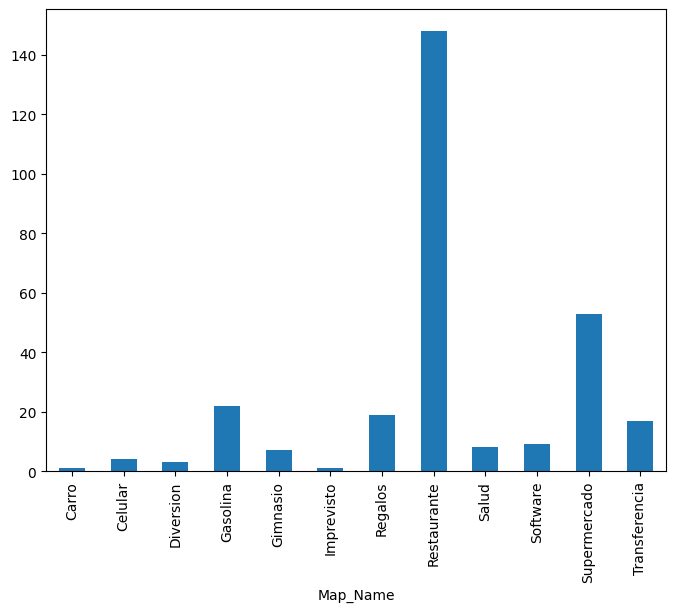

In [95]:
#Gráfico de barras
fig = plt.figure(figsize=(8,6))
df.groupby('Map_Name').Map_Text.count().plot.bar(ylim=0)
plt.show()

In [97]:
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')
features = tfidf.fit_transform(df.Map_Text).toarray()
labels = df.category_id
features.shape


(292, 65)

In [98]:

N = 2
for Product, category_id in sorted(category_to_id.items()):
  features_chi2 = chi2(features, labels == category_id)
  indices = np.argsort(features_chi2[0])
  feature_names = np.array(tfidf.get_feature_names_out())[indices] #out
  unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
  bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
  print("# '{}' :".format(Product))
  print(" .Most correlated unigrams:\n. {}".format( '\n. '.join(unigrams[-N:])))
  print(".Most correlated bigrams:\n. {}".format('\n. '.join(bigrams[-N:])))


# 'Carro' :
 .Most correlated unigrams:
. la
. del
.Most correlated bigrams:
. del sol
. subway latina
# 'Celular' :
 .Most correlated unigrams:
. la
. del
.Most correlated bigrams:
. del sol
. subway latina
# 'Diversion' :
 .Most correlated unigrams:
. del
. auto
.Most correlated bigrams:
. del sol
. subway latina
# 'Gasolina' :
 .Most correlated unigrams:
. galera
. servicentro
.Most correlated bigrams:
. servicentro el
. servicentro la
# 'Gimnasio' :
 .Most correlated unigrams:
. gimnasio
. cipreses
.Most correlated bigrams:
. subway latina
. gimnasio cipreses
# 'Imprevisto' :
 .Most correlated unigrams:
. del
. curridabat
.Most correlated bigrams:
. del sol
. subway latina
# 'Regalos' :
 .Most correlated unigrams:
. auto
. carlos
.Most correlated bigrams:
. subway latina
. san carlos
# 'Restaurante' :
 .Most correlated unigrams:
. auto
. subway
.Most correlated bigrams:
. auto mercado
. subway latina
# 'Salud' :
 .Most correlated unigrams:
. plaza
. fischel
.Most correlated bigrams

In [99]:
X_train, X_test, y_train, y_test = train_test_split(df['Map_Text'], df['Map_Name'], random_state= 0)
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
clf = LogisticRegression().fit(X_train_tfidf, y_train)


In [100]:
results = clf.predict(count_vect.transform(["subway"]))
prob_per_class_dictionary = dict(zip(model.classes_, results))

print(prob_per_class_dictionary)

{0: 'Restaurante'}


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
<ipython-input-101-977a0ad68d34>:18: FutureWarning: Use "auto" to set automatic grayscale colors. From v0.14.0, "gray" will default to matplotlib's definition.
  sns.stripplot(x='model_name', y='accuracy', data=cv_df,


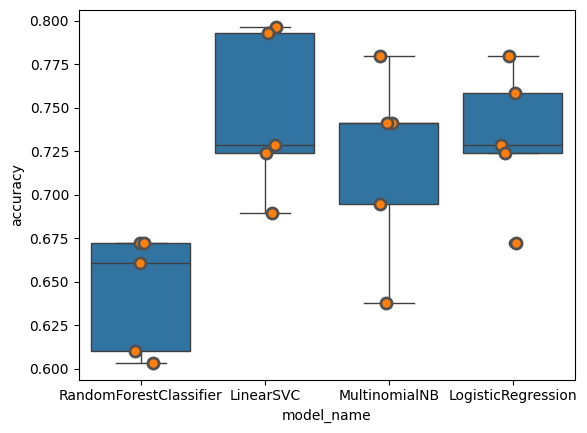

In [101]:
models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])
import seaborn as sns
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df,
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

In [102]:
cv_df.groupby('model_name').accuracy.mean()

,accuracy
model_name,
LinearSVC,0.746464
LogisticRegression,0.732729
MultinomialNB,0.719053
RandomForestClassifier,0.643892


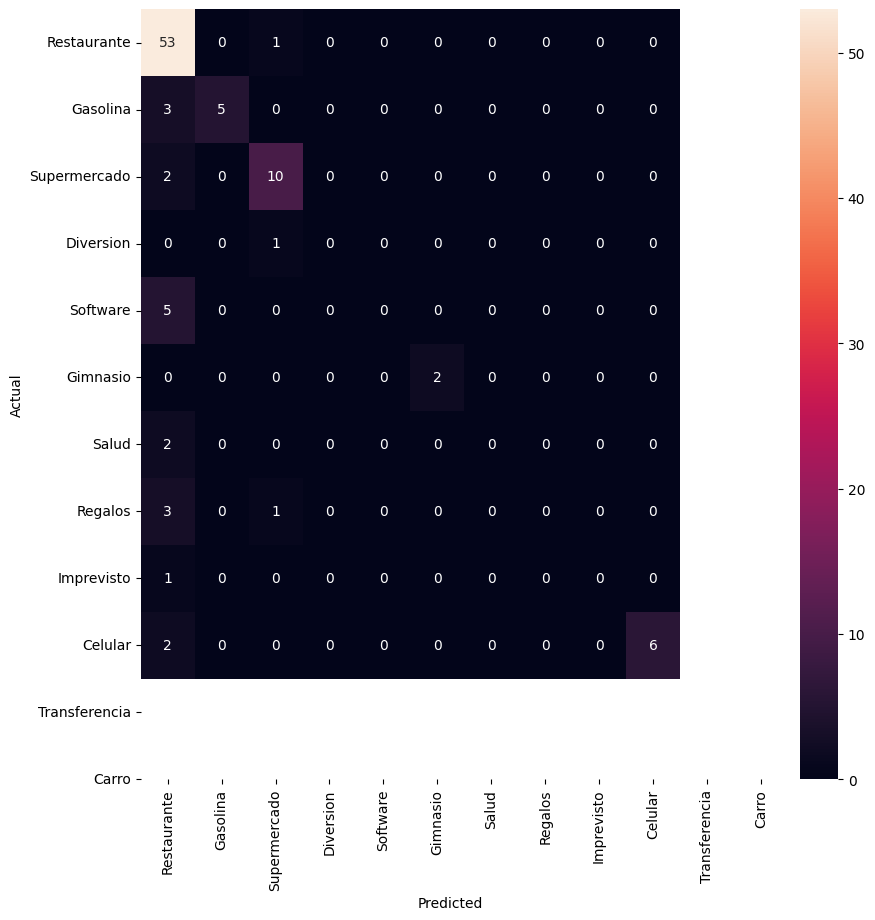

In [103]:
model = LogisticRegression()
X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, df.index, test_size=0.33, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=category_id_df.Map_Name.values, yticklabels=category_id_df.Map_Name.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

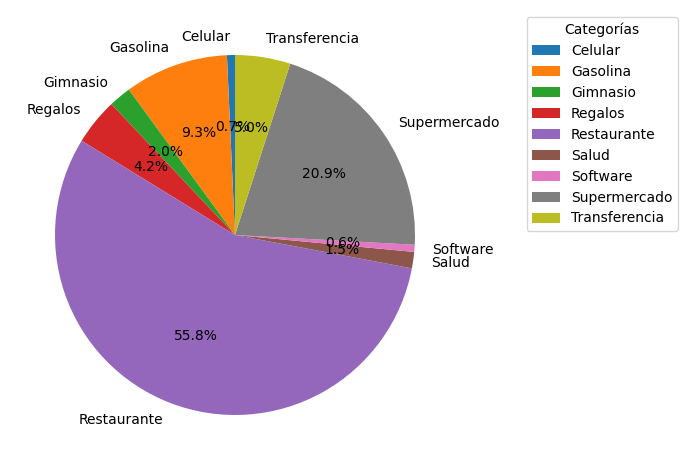

In [105]:

# Cargar datos
test_data = pd.read_csv('/content/sample_data/TrainingData2 (2).csv', header=0, encoding='latin-1', on_bad_lines='skip')
# Realizar predicciones
test_data["predicted"] = clf.predict(count_vect.transform(test_data['Map_Text']))

# Agrupar por categoría y sumar Total_Expense
resumen_gastos = test_data.groupby('predicted')['Total_Expense'].sum()

# Crear el gráfico circular
plt.pie(resumen_gastos,
        labels=resumen_gastos.index,
        autopct='%1.1f%%',
        startangle=90)


#Leyenda
plt.legend(resumen_gastos.index,
          title="Categorías",
          loc="upper right",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.tight_layout()
plt.show()


In [24]:
# Realiza predicciones
test_data["predicted"] = clf.predict(count_vect.transform(test_data['Map_Text']))

# Agrupar por categoría y suma Total_Expense
resumen_gastos = test_data.groupby('predicted')['Total_Expense'].sum().reset_index()

#Ver el total de gastos de cada categoría
print(resumen_gastos)

         predicted  Total_Expense
0  Entretenimiento      320406.93
1         Gasolina      134854.75
2         Gimnasio       83750.00
3              Luz      100016.00
4      Restaurante      942763.68
5             Ropa       61275.93
6            Salud      127965.00
7     Supermercado      434025.29
8    Transferencia      130203.75


In [32]:
!pip install joblib


In [33]:
from joblib import dump

# Guarda el modelo
dump(clf, 'modelo_gastos.joblib')


['modelo_gastos.joblib']

In [34]:
from google.colab import files

#Descarga el modelo
files.download('modelo_gastos.joblib')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>